# PRAVEER SAXENA

Task 2: Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

In [1]:
#Import required libraries
import nltk
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets open the text file
text = open('firstday.txt', encoding="utf-8").read()

print(text)




﻿As soon as my mother drove away last August, leaving me at the University of Maryland, alone, I began my journey of becoming an adult; at least I feel like I did. I remember walking into the building where I was going to live for the next year, feeling really old. “I am a college freshman,” I thought to myself. I did not know what to expect out of my freshman year. They say that college is a time of self-discovery, full of both trials and prosperity, and lasting memories and friends. Little did I know, my first year of college would bring about so many experiences, both positive and negative, that would forever change me.
The first couple of weeks were a complete party. All freshmen around me were completely enthralled by the newfound freedom that college came with. We could stay up and out as late as we wanted to without any questions. We could eat whatever we wanted and have our rooms as messy as we wanted. We were with friends twenty-four hours a day, creating close bonds and frien

In [3]:
#Lets convert it into lower case
lower_case = text.lower()

# str.maketrans removes any punctuations 
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words
tokenized_words = word_tokenize(cleaned_text, "english")

In [4]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [5]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [6]:
#Lets open the emotion document and find emotion present in our text
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            
print("People emotions from the text \n", emotion_list, '\n \n')


w = Counter(emotion_list)
print("Count of each emotion \n", w)

People emotions from the text 
 [' happy', ' happy', ' happy', ' alone'] 
 

Count of each emotion 
 Counter({' happy': 3, ' alone': 1})


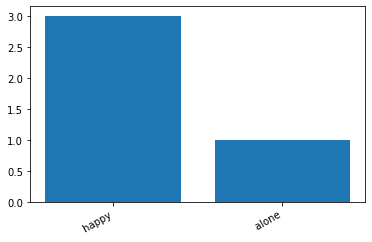

In [7]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()